In [1]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
df = pd.read_csv('queen.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1568167503947235331,1568167503947235331,2022-09-09 14:50:42 India Standard Time,2022-09-09,14:50:42,530,963099618547589121,inpd_,In Professional Development,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1568167501334253568,1568167501334253568,2022-09-09 14:50:42 India Standard Time,2022-09-09,14:50:42,530,26475981,ukpostbox,UK Postbox,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1568167500134731776,1568167500134731776,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,868028006610153472,brandminds,BRAND MINDS,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1568167499320987648,1568167499320987648,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,340163485,nxcoventry,NX Coventry,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1568167498410778631,1568167498410778631,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,19282280,metoffice,Met Office,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [4]:
df['tweet']

0         We at In Professional Development join with pe...
1         Join us in remembering Her Majesty Queen Eliza...
2         "When life seems hard, the courageous do not l...
3         We join the nation in mourning the death of He...
4         We are saddened by the death of Her Majesty Qu...
                                ...                        
190320    Queen Elizabeth II, Britain's longest-reigning...
190321    Queen Elizabeth II dies at age 96  https://t.c...
190322    GOD SAVE THE KING !! Today a figure of our his...
190323    70 years. ⠀⠀ 15 Prime Ministers. ⠀⠀ 13 America...
190324    She wasn't perfect but she was great, an insti...
Name: tweet, Length: 190325, dtype: object

In [5]:
df["tweet"] = df["tweet"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...'@#_“”()—]", " ", s).split()))

In [10]:
stop = set(stopwords.words('english'))
newStopWords = ['http','CO','https','u']
stop.update(newStopWords)

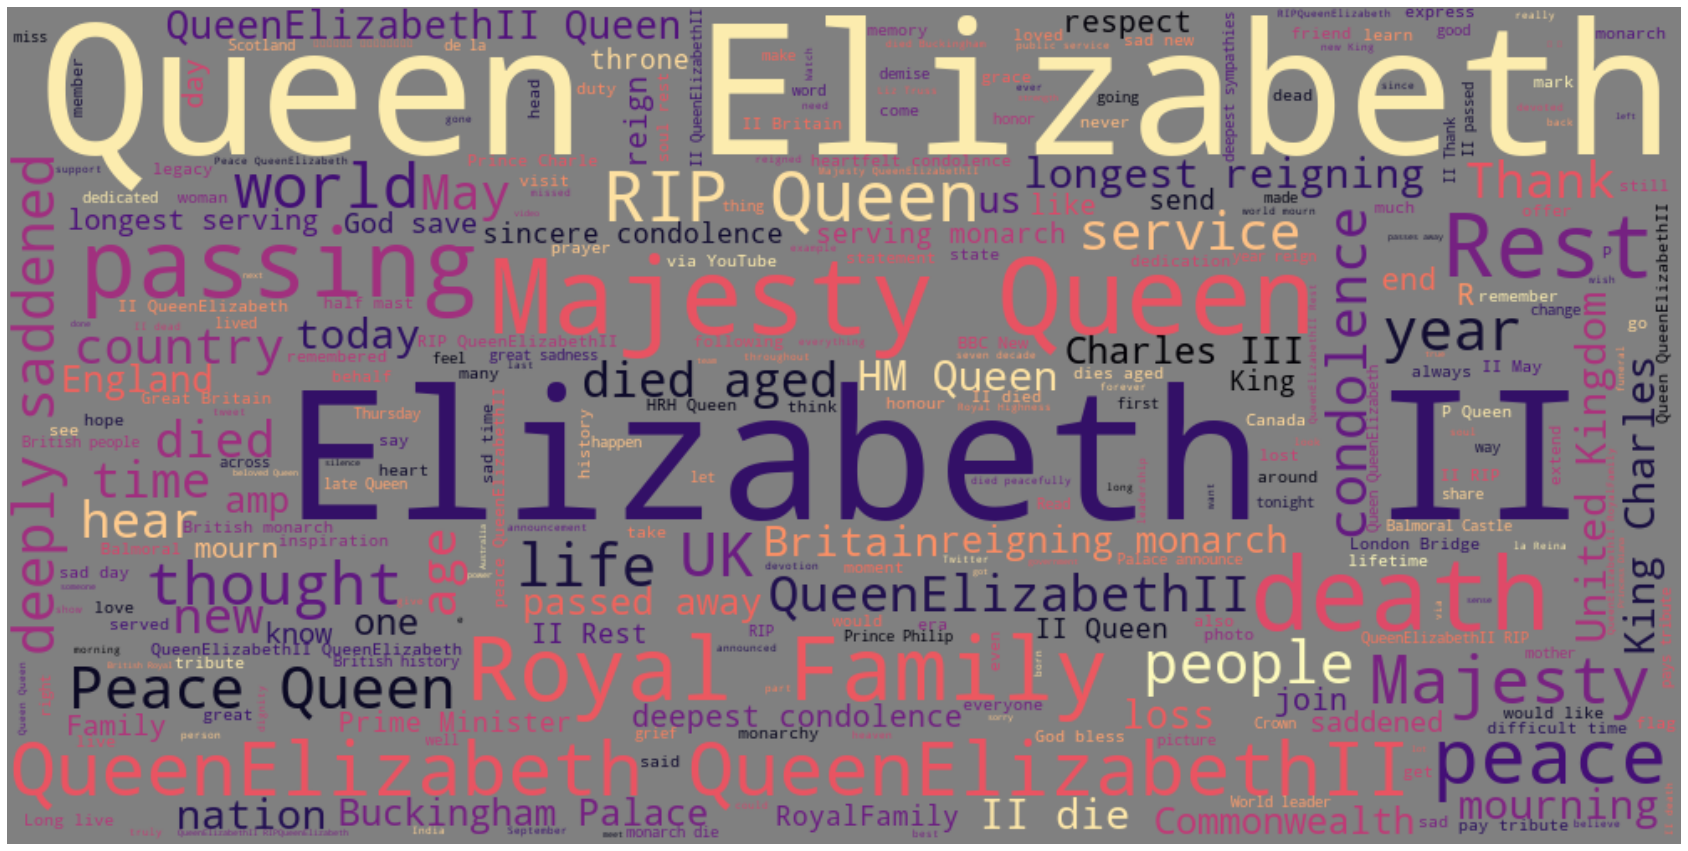

In [11]:
text = " ".join(i for i in df.tweet)
wordcloud = WordCloud(stopwords=stop, background_color="grey", 
                      max_words=300,
                      width=1000, 
                      height=500,
                      colormap="magma" ).generate(text)
plt.figure( figsize=(30,30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig("cloud.png", format="png")
plt.show()